In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA

In [43]:
df=pd.read_csv('sales_data.csv')

In [44]:
df.isna().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

It appears that there are some missing data, so it's necessary to handle them. It's good that there is a relationship between the data, which makes dealing with missing data easier.

In [45]:
# Fill null values based on conditions
df.loc[df['price'].isnull(), 'price'] = df['revenue'] / df['quantity']
df.loc[df['revenue'].isnull(), 'revenue'] = df['price'] * df['quantity']
df.loc[df['quantity'].isnull(), 'quantity'] = df['revenue'] / df['price']

In [46]:
df=df.drop_duplicates()

In [47]:
df.nunique()

date        365
product      14
category      8
price        11
quantity     19
revenue      31
dtype: int64

It seems that the data contains 14 products and 8 categories. Let's take a look at them to see how they appear.

In [48]:
df['category'].unique()

array(['Electronics', 'Clothing', 'Accessories', 'Bags', 'Shoes',
       'Clohting', 'Bgas', 'Shoeses'], dtype=object)

It seems that some of the category are registered incorrectly. Let's correct this issue.

In [49]:
df['category']=df['category'].replace('Bgas','Bags')
df['category']=df['category'].replace('Clohting','Clothing')
df['category']=df['category'].replace('Shoeses','Shoes')

In [50]:
df['category'].unique()

array(['Electronics', 'Clothing', 'Accessories', 'Bags', 'Shoes'],
      dtype=object)

In [51]:
df['product'].unique()

array(['Smartphone', 'Laptop', 'T-Shirt', 'Headphones', 'Watch', 'Tablet',
       'Coat', 'Smartwatch', 'Speaker', 'Backpack', 'Hoodie', 'Sneakers',
       'Wallet', 'Jeans'], dtype=object)

There don't seem to be any issues with the product column, so let's continue exploring.

In [52]:
df.describe()

,price,quantity,revenue
count,368.000000,368.000000,368.000000
mean,211.032609,14.513587,2062.853261
std,227.068797,8.559765,1910.403972
min,20.000000,3.000000,300.000000
25%,50.000000,8.000000,800.000000
50%,100.000000,12.000000,1200.000000
75%,250.000000,20.000000,2400.000000
max,1200.000000,50.000000,7200.000000


Exploratory statistics reveal a significant diversity in the data values.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      368 non-null    object 
 1   product   368 non-null    object 
 2   category  368 non-null    object 
 3   price     368 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.1+ KB


It appears that there is an issue with the date column. Let's fix that problem.

In [54]:
df['date']=pd.to_datetime(df['date'])

In [83]:
display(df['revenue'].sum())
display(df['quantity'].sum())

759130.0

5341.0

Let's explore the revenue from sales for each product.box plot will be good

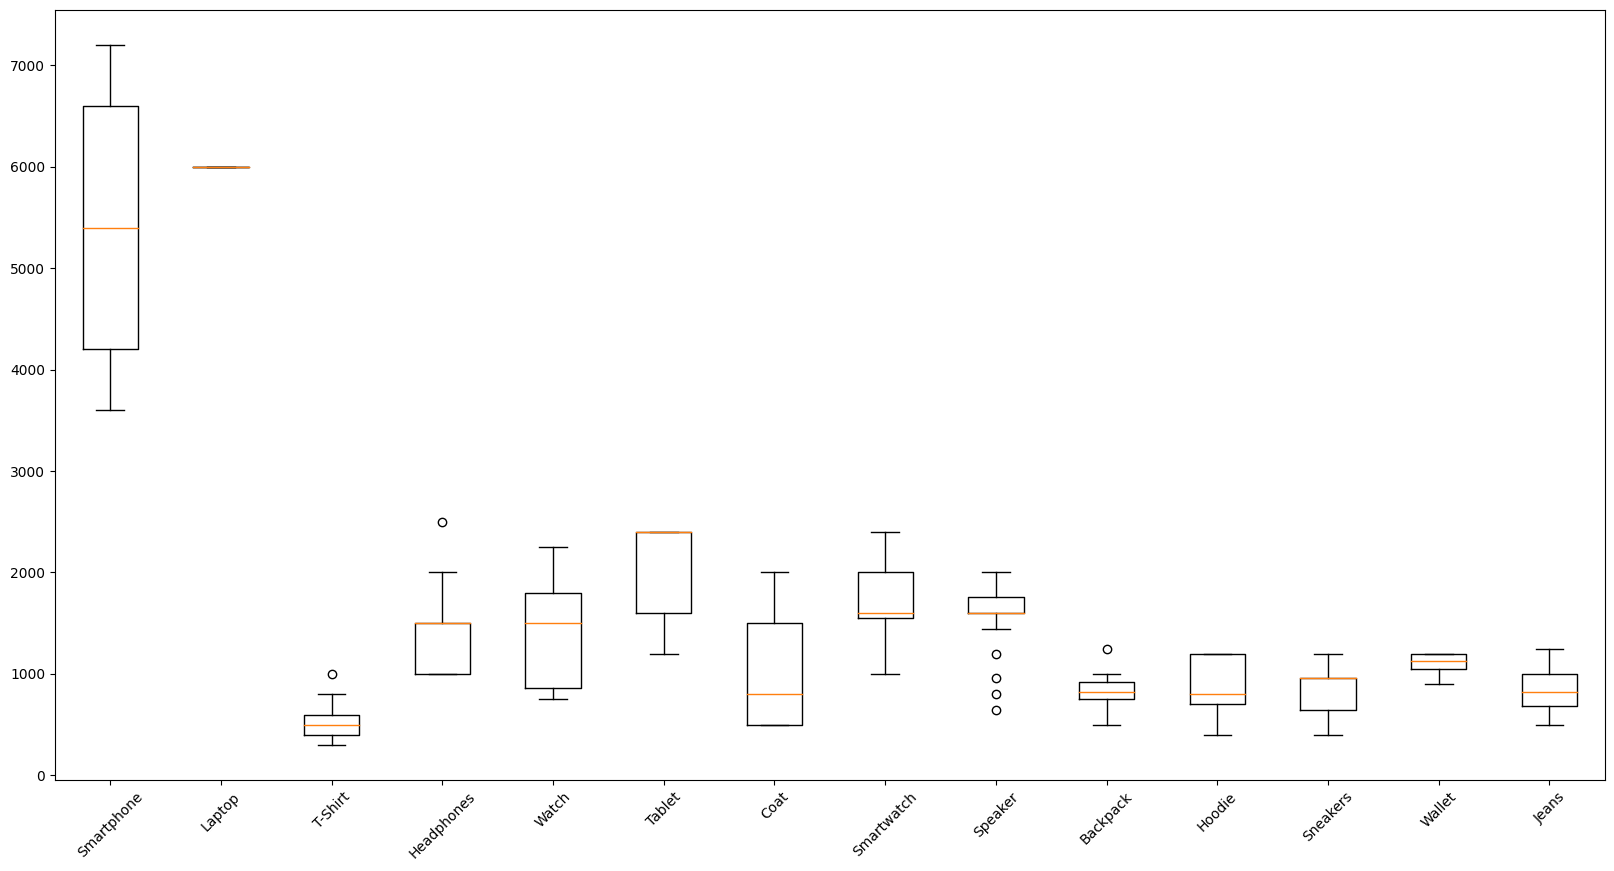

In [55]:
products = df['product'].unique()
# Create a list to store the data for each product
data = []

# Loop through each product and append its revenue data to the data list
for product in products:
    data.append(df[df['product'] == product]['revenue'])

# Create the boxplot
fig, ax = plt.subplots(figsize=(20,10))
plt.boxplot(data, labels=products)
plt.xticks(rotation=45)

# Show the plot
plt.show()

It seems that there is an issue where some products have missing whisker or only have a line instead of a box. Let's take a closer look at those products for further analysis.

In [56]:
df[df['product']=='Tablet'].describe()

,price,quantity,revenue
count,9.0,9.000000,9.000000
mean,400.0,5.000000,2000.000000
std,0.0,1.322876,529.150262
min,400.0,3.000000,1200.000000
25%,400.0,4.000000,1600.000000
50%,400.0,6.000000,2400.000000
75%,400.0,6.000000,2400.000000
max,400.0,6.000000,2400.000000


It seems that the issue is caused by the fact that the maximum value is equal to the 75th percentile, resulting in the absence of an upper whisker.

In [57]:
df[df['product']=='Headphones'].describe()

,price,quantity,revenue
count,13.0,13.000000,13.000000
mean,100.0,13.846154,1384.615385
std,0.0,4.634043,463.404348
min,100.0,10.000000,1000.000000
25%,100.0,10.000000,1000.000000
50%,100.0,15.000000,1500.000000
75%,100.0,15.000000,1500.000000
max,100.0,25.000000,2500.000000


The same issue occurs when the lower value is equal to the 25th percentile, resulting in the absence of a lower whisker.

In [58]:
df[df['product']=='Laptop'].describe()

,price,quantity,revenue
count,1.0,1.0,1.0
mean,1200.0,5.0,6000.0
std,NaN,NaN,NaN
min,1200.0,5.0,6000.0
25%,1200.0,5.0,6000.0
50%,1200.0,5.0,6000.0
75%,1200.0,5.0,6000.0
max,1200.0,5.0,6000.0


Since the laptop has only been sold once, it cannot be plotted on the box plot

we have a few of data , this reason of why some boxes dont have whisker

Text(0, 0.5, 'quantity')

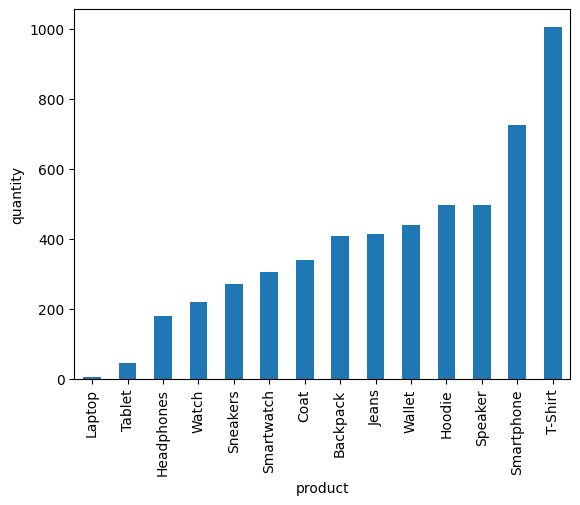

In [59]:
df.groupby('product')['quantity'].sum().sort_values().plot(kind='bar')
plt.ylabel('quantity')

It appears that the T-shirt is the best-selling item, followed by the smartphone . On the other hand, the laptop is the least-selling item.

Is the T-shirt responsible for the large number of revenue ?

<Axes: xlabel='product'>

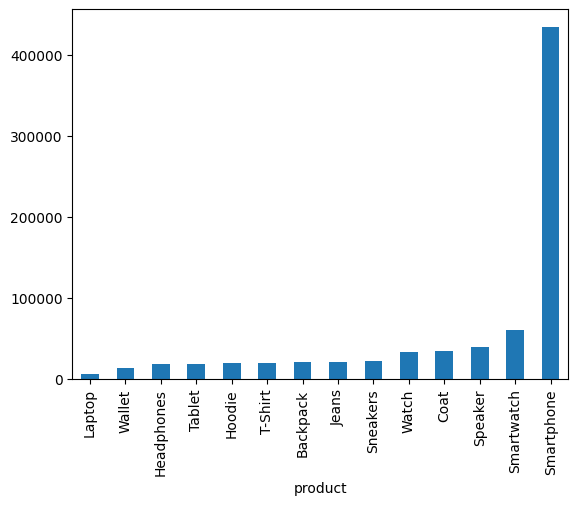

In [60]:
df.groupby('product')['revenue'].sum().sort_values().plot(kind='bar')


No, the T-shirt ranks ninth in terms of profitability, while the smartphone is the most responsible for generating profits.


Let's explore sales by month.

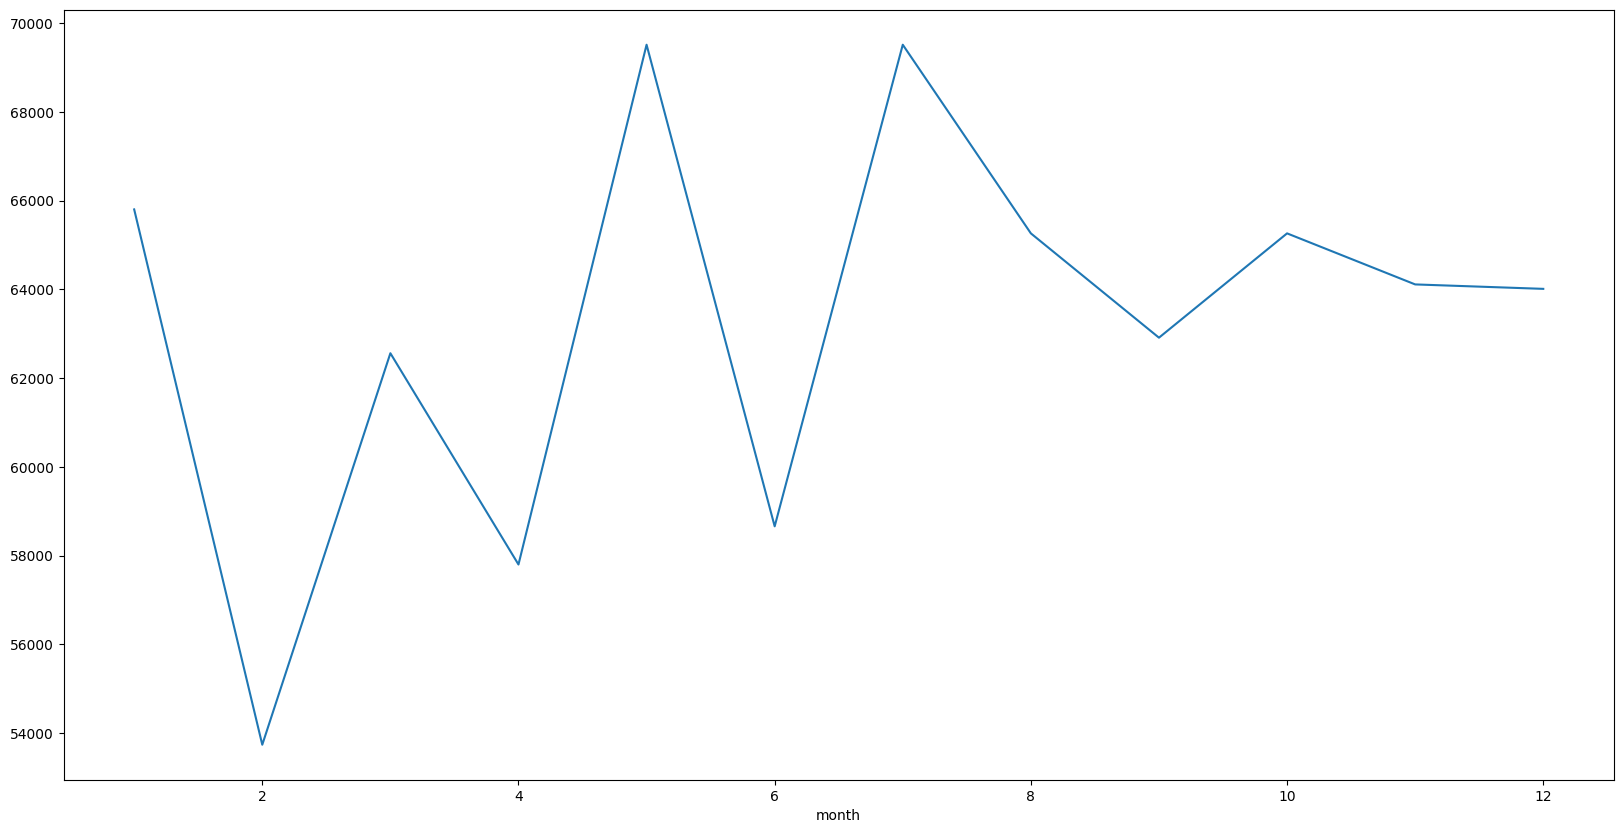

In [61]:
df['month']=df['date'].dt.month
fig, ax = plt.subplots(figsize=(20,10))
df.groupby('month')['revenue'].sum().plot()
plt.show()

It appears that revenues increase in the months of May and July, which correspond to the second and third quarters of the year. This pattern could be attributed to the summer vacation period when people tend to purchase gifts and items related to summer activities.

Now that we are done with the exploratory analysis, let's do the ABC analysis
but what is ABC analysis

ABC analysis is a technique used to categorize items or products based on their importance or value. It classifies items into three categories: A, B, and C, representing high, medium, and low priority respectively. To perform ABC analysis for the given data, we need to consider the sales or revenues for each product.

1. Calculate the total sales/revenues for each product.
2. Calculate the percentage contribution of each product to the total sales.
3. Sort the products in descending order based on their percentage contribution.
4. Assign categories A, B, and C based on the cumulative contribution of the products. For example, you can assign the top 20% as category A, the next 30% as category B, and the remaining 50% as category C.
5. Analyze the results and identify the high-value items (category A) that contribute the most to the sales/revenues.



In [62]:
df_revenue=pd.DataFrame(df.groupby('product')['revenue'].sum().sort_values(ascending=False))
df_revenue


,revenue
product,
Smartphone,434400.0
Smartwatch,60800.0
Speaker,39680.0
Coat,33800.0
Watch,32700.0
Sneakers,21600.0
Jeans,20650.0
Backpack,20400.0
T-Shirt,20100.0


-create a new column for cumlative sum
-calculate total revenue
-create a new column for cumlative percentage

In [63]:
df_revenue['cumlative_revenue'] = df_revenue['revenue'].cumsum()
total_revenue=df['revenue'].sum()
df_revenue['cumlative_percentage']=df_revenue['cumlative_revenue']/total_revenue*100

 Create a function to assign the ABC notation based on the cumulative percentage

In [64]:
def assign_abc(row):
    if row['cumlative_percentage'] <= A_threshold:
        return 'A'
    elif row['cumlative_percentage'] <= B_threshold:
        return 'B'
    else:
        return 'C'

In [65]:
A_threshold = 80
B_threshold = 95

# Apply the function to the DataFrame to create a new column with the ABC notation
df_revenue['ABC'] = df_revenue.apply(assign_abc,axis=1)
df_revenue

,revenue,cumlative_revenue,cumlative_percentage,ABC
product,,,,
Smartphone,434400.0,434400.0,57.223400,A
Smartwatch,60800.0,495200.0,65.232569,A
Speaker,39680.0,534880.0,70.459605,A
Coat,33800.0,568680.0,74.912070,A
Watch,32700.0,601380.0,79.219633,A
Sneakers,21600.0,622980.0,82.064995,B
Jeans,20650.0,643630.0,84.785215,B
Backpack,20400.0,664030.0,87.472501,B
T-Shirt,20100.0,684130.0,90.120269,B


We have 5 products A class , next step is store it in list  

In [66]:
A_class=df_revenue[df_revenue['ABC']=='A'].index.to_list()
A_class

['Smartphone', 'Smartwatch', 'Speaker', 'Coat', 'Watch']

Let's explore the revenue for each product according to the months."

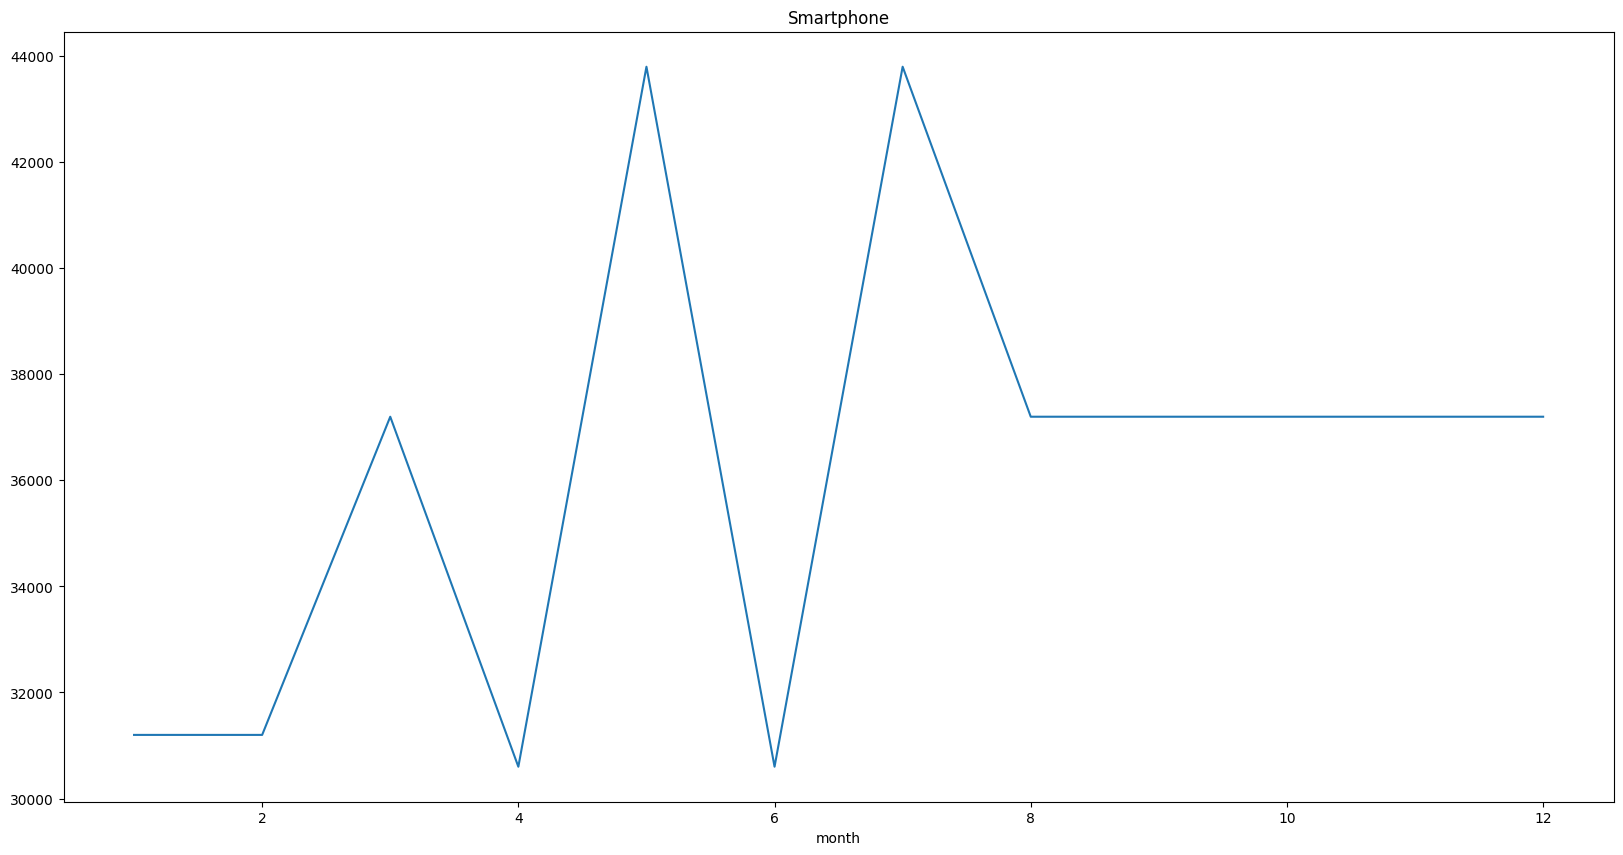

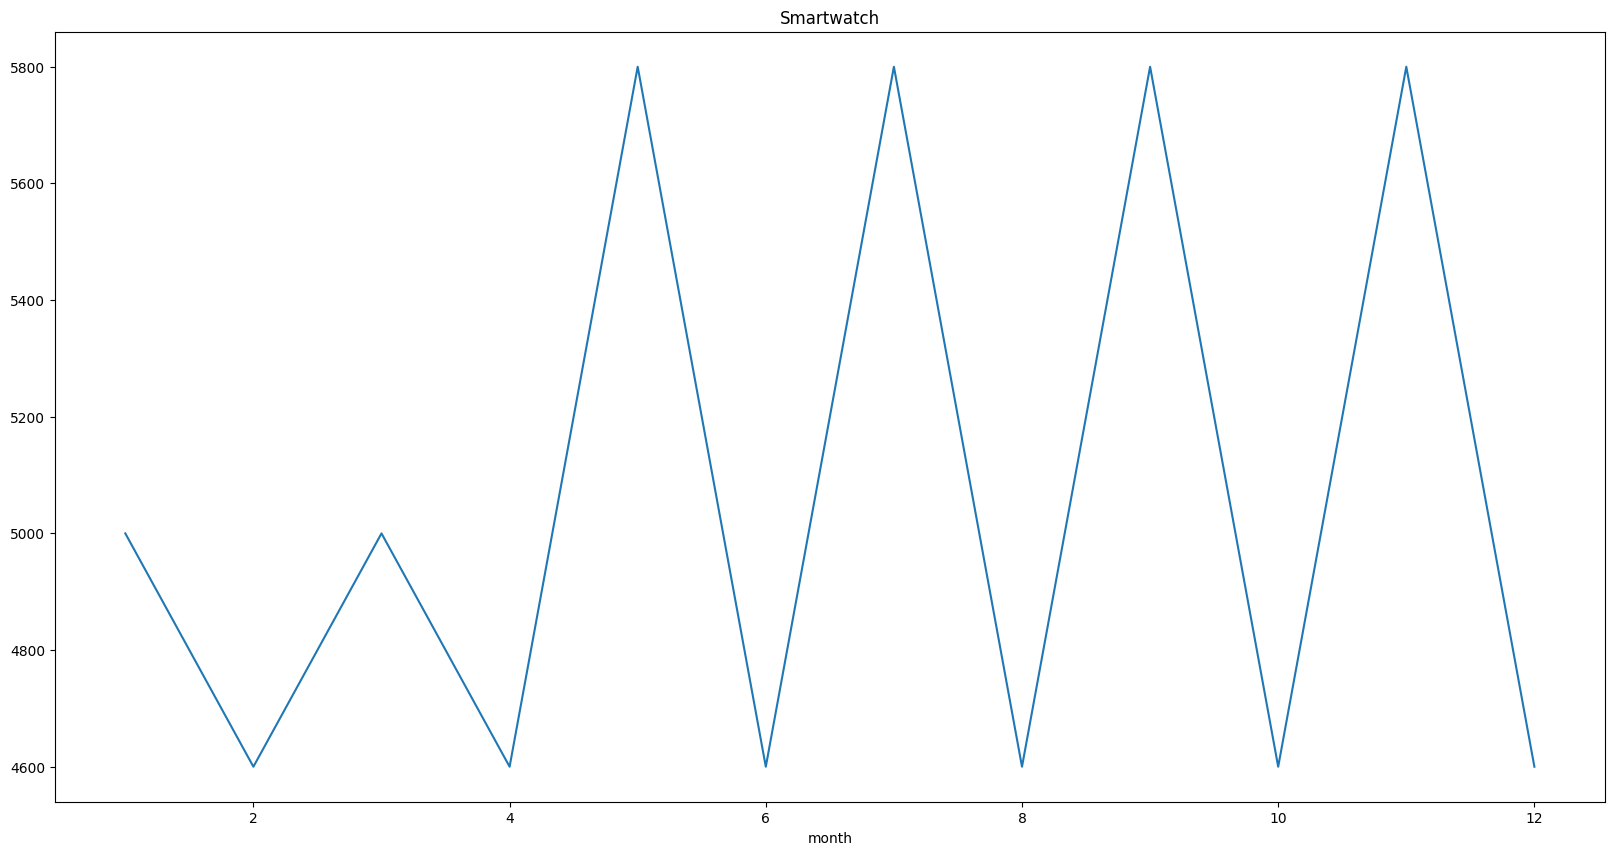

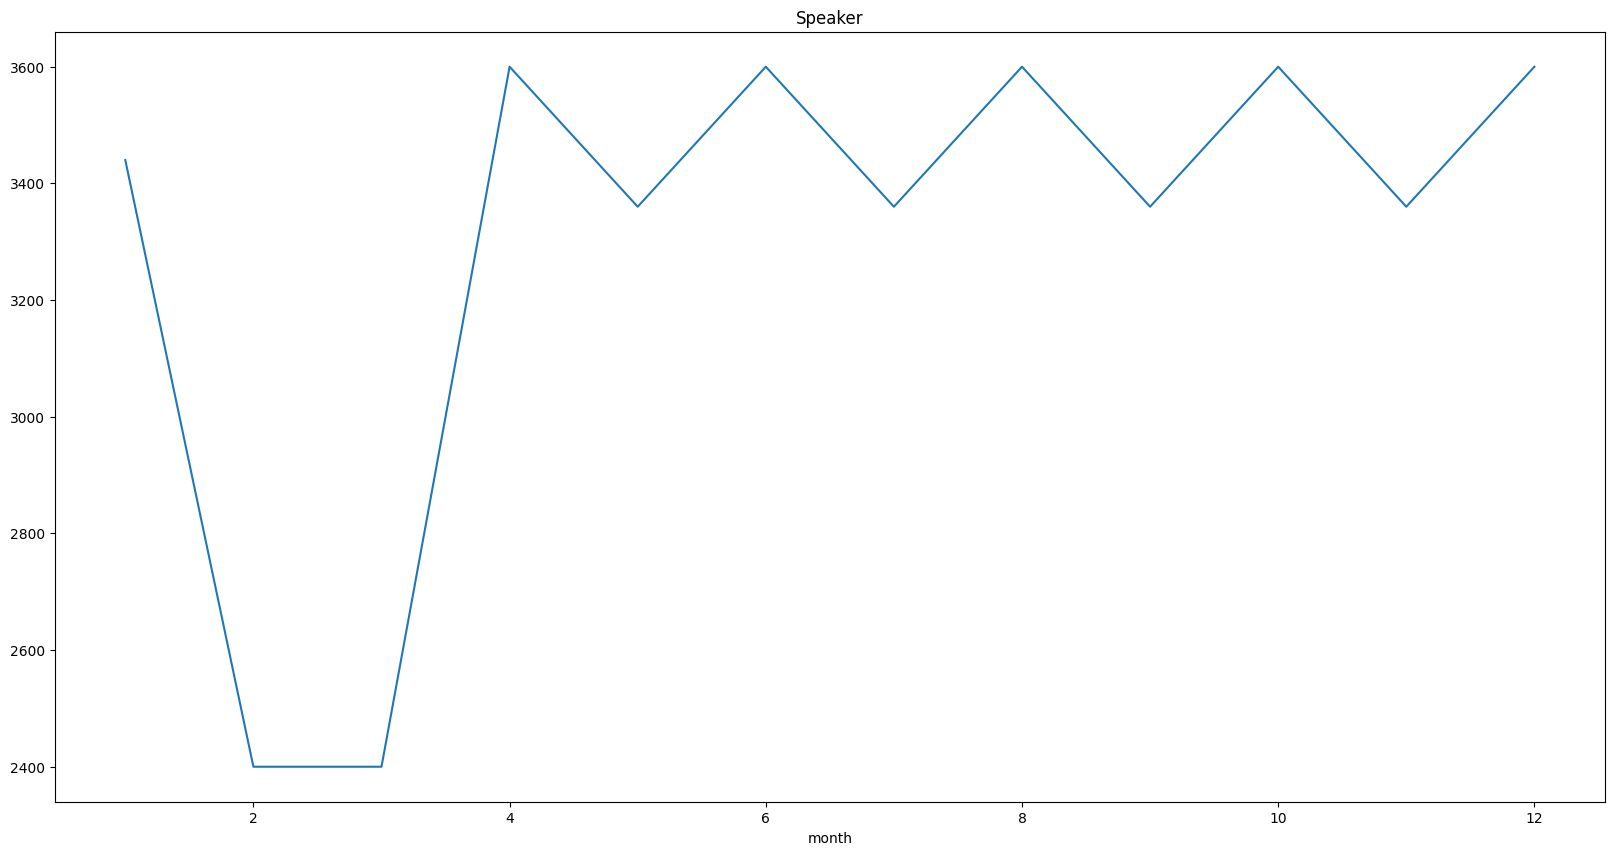

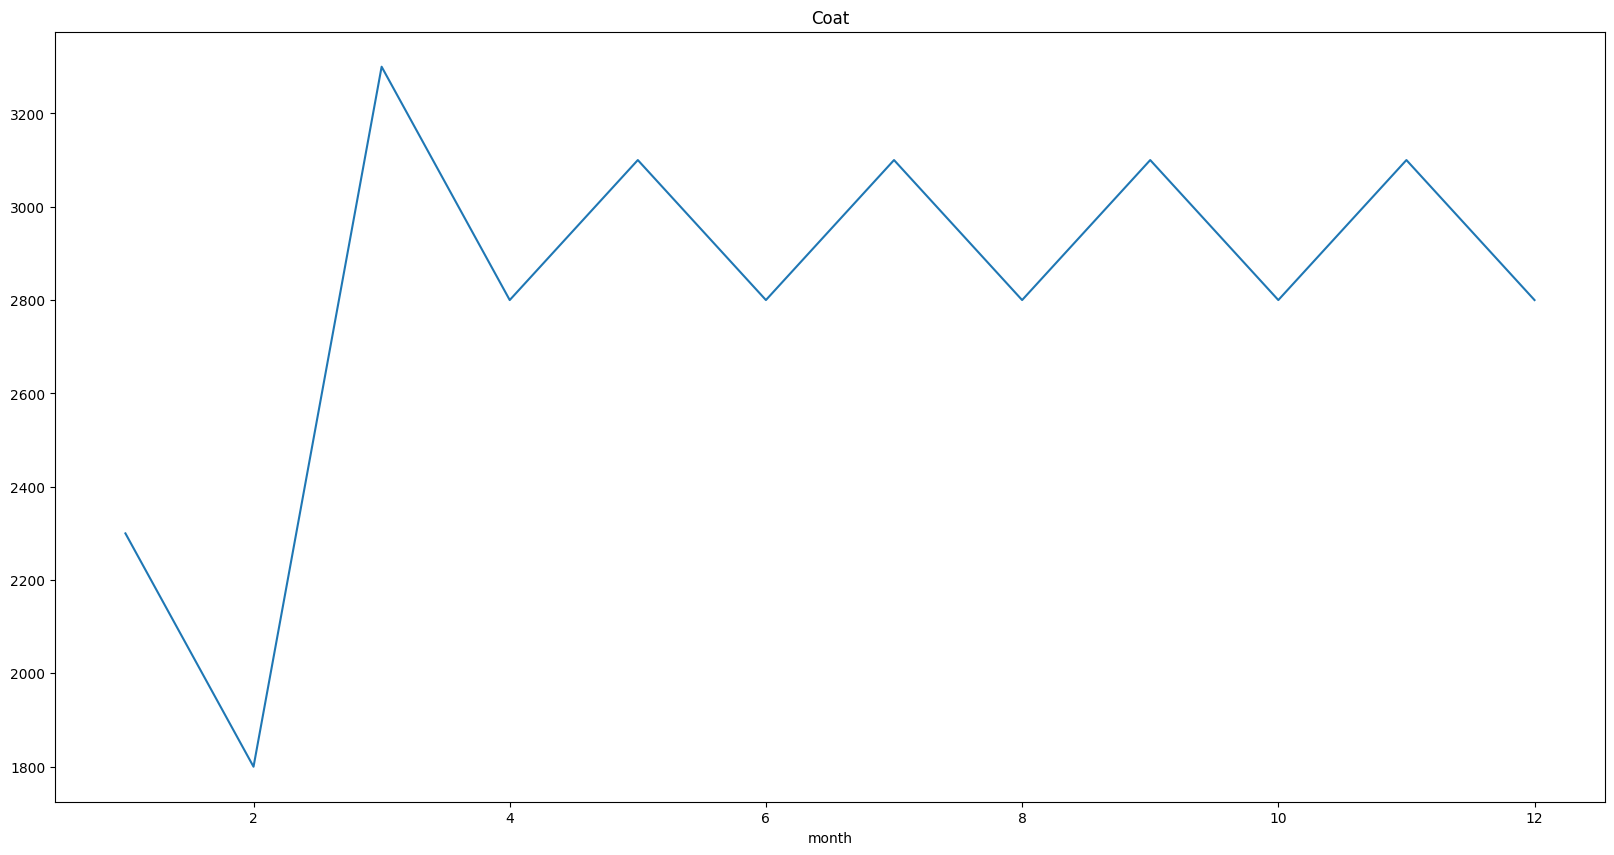

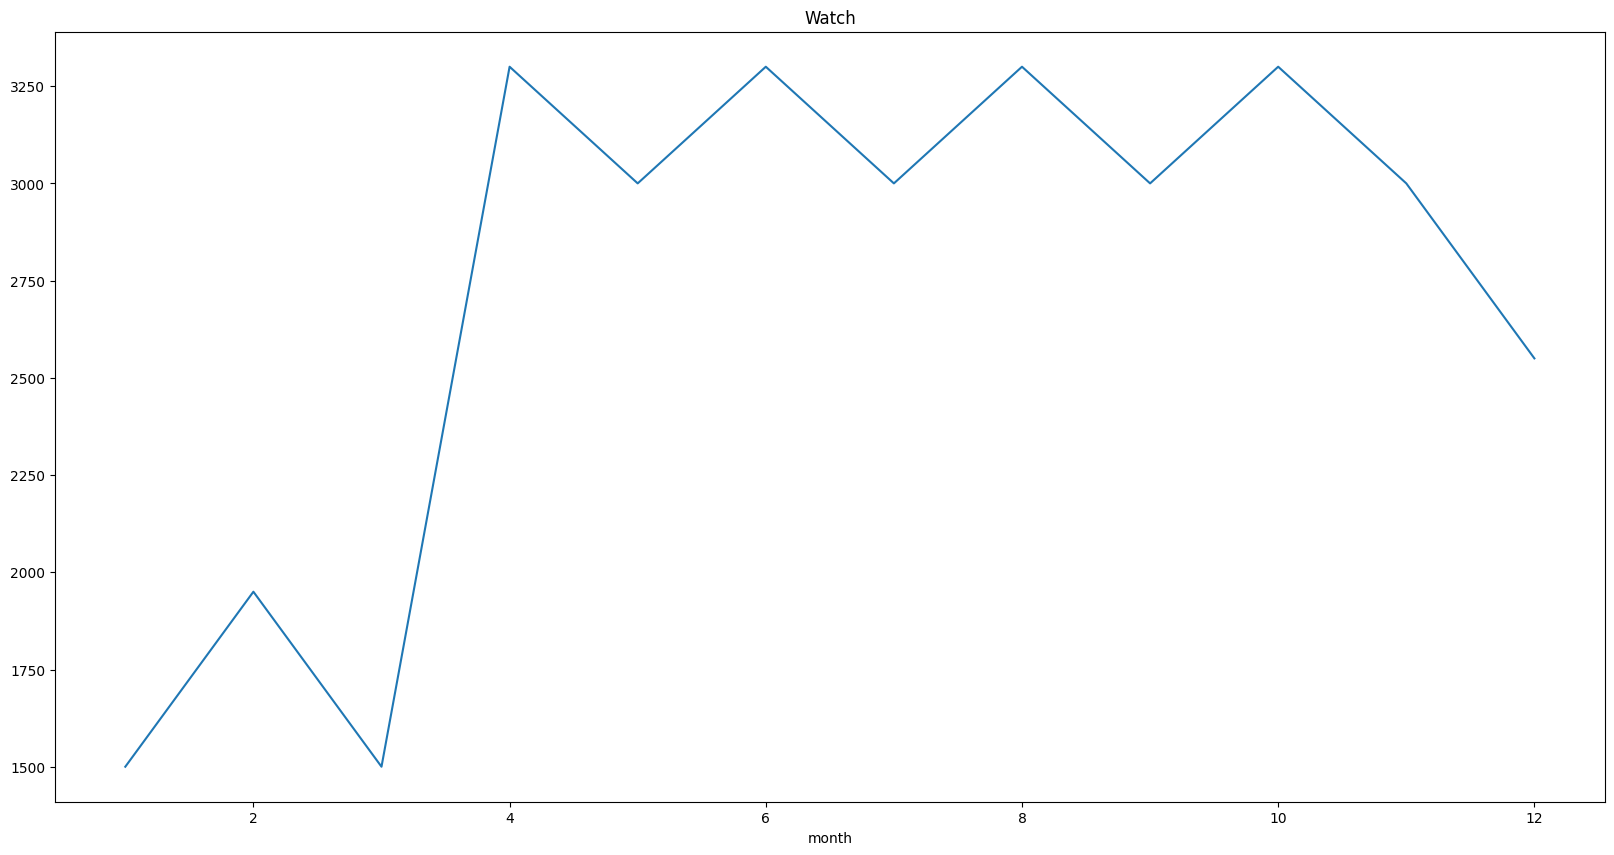

In [67]:
for p in A_class:
    fig, ax = plt.subplots(figsize=(20,10))
    df[df['product']==p].groupby('month')['revenue'].sum().plot()
    plt.title(p)
    plt.show()

It appears that the products follow a similar pattern in terms of monthly revenue throughout the year. Let's plot the monthly revenue for all products along with the annual revenue for products of class A.



In [68]:
df_A_class=df.loc[df['product'].isin(A_class)]


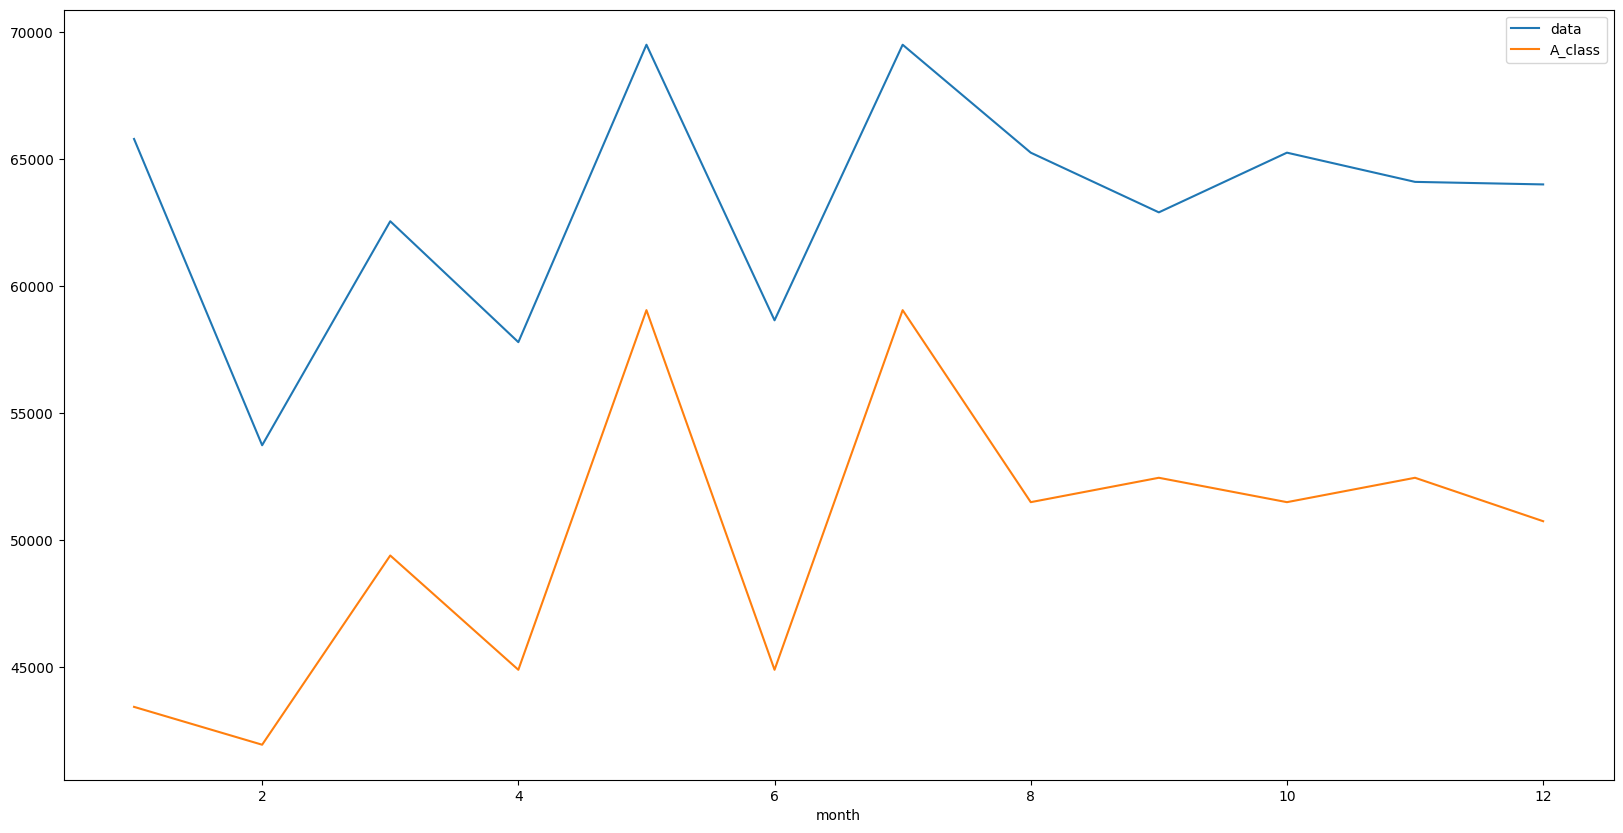

In [69]:
fig, ax = plt.subplots(figsize=(20,10))
df.groupby('month')['revenue'].sum().plot(label='data')
df_A_class.groupby('month')['revenue'].sum().plot(label='A_class')
plt.legend()
plt.show()

It appears that the products follow a similar pattern in terms of revenue throughout the months of the year, with a noticeable difference in January. It seems that the sales of other lower-class products contribute to the profit during that period.

Drawing pareto chart

In [70]:
def create_pareto_chart(x_axis, y_axis):
    import pandas as pd
    import matplotlib.pyplot as plt
    from matplotlib.ticker import PercentFormatter
    # Create a DataFrame with your data
    data = {'Product': x_axis, 'Count': y_axis}
    df = pd.DataFrame(data)

    # Sort the DataFrame by count in descending order
    df = df.sort_values(by='Count', ascending=False)

    # Calculate the cumulative percentage
    df['Cumulative Percentage'] = df['Count'].cumsum() / df['Count'].sum() * 100

    # Create a bar plot for the counts
    fig, ax = plt.subplots(figsize=(20,10))
    ax.bar(df['Product'], df['Count'], color='C0')
    plt.xticks(rotation=45)
    # Create a line plot for the cumulative percentage
    ax2 = ax.twinx()
    ax2.plot(df['Product'], df['Cumulative Percentage'], color='C1', marker='D', ms=7)
    ax2.yaxis.set_major_formatter(PercentFormatter())

    # Add a horizontal line at 80%
    ax2.axhline(y=80, color='black', linestyle='--')

    # Set axis colors
    ax.tick_params(axis='y', colors='C0')
    ax2.tick_params(axis='y', colors='black')
    # Show the plot
    plt.show()

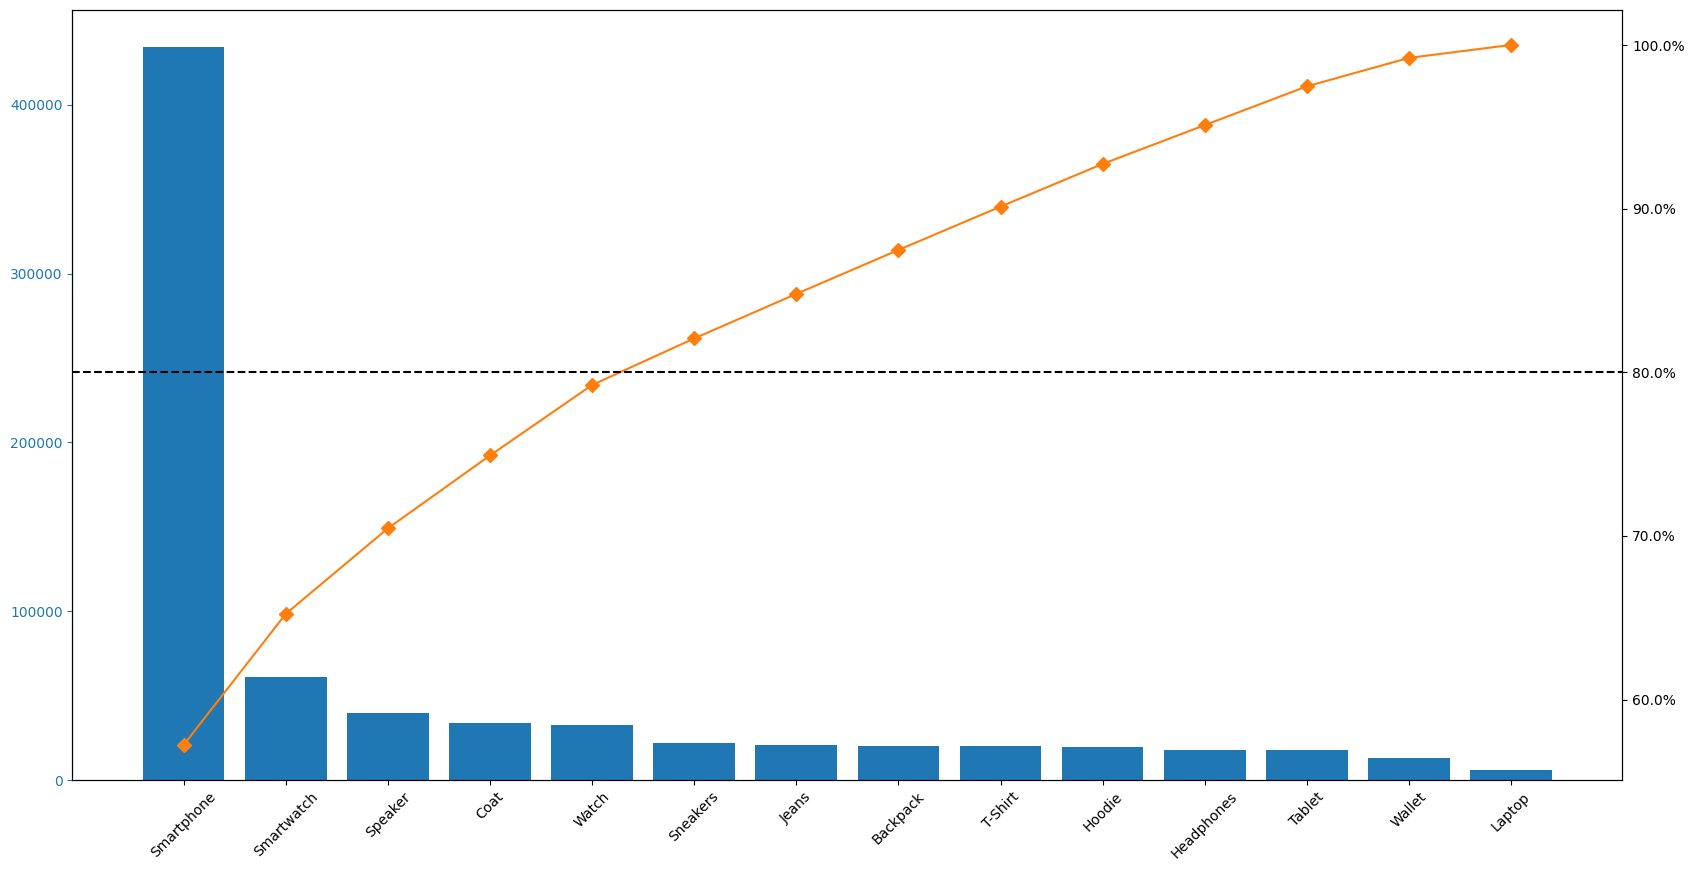

In [71]:
create_pareto_chart(df_revenue.index, df_revenue['revenue'])

Pareto is a visual representation of the ABC analysis, where it shows the total cumulative revenue and there is a horizontal line from the 80% point to indicate the products that meet the condition

next, make forecast for next order (quantity and date )

In [79]:
def predict_date_and_quantity(df,p):
    import pandas as pd
    from statsmodels.tsa.arima.model import ARIMA
    from sklearn.metrics import mean_squared_error
    import matplotlib.pyplot as plt
    import numpy as np

    df = df[df['product'] == p]

    # Convert the date column to a datetime object
    df['date'] = pd.to_datetime(df['date'])

    # Calculate the difference in days between the current date and the previous date
    df['day'] = (df['date'] - df['date'].shift(1)).dt.days
    df=df[['date','product','quantity','day']]
    df.index=df['date']
    df=df.drop(['date'],axis=1)
    # Split the data into train and test sets
    split_index = int(len(df) * 0.8)
    train = df.iloc[:split_index]
    test = df.iloc[split_index:]


    # Fit an ARIMA model to the quantity data
    model = ARIMA(train['quantity'], order=(1, 1, 1))
    model1_fit = model.fit()

    # Make predictions for the test set
    quantity_forecast = model1_fit.forecast(steps=len(test))

    # Calculate the mean squared error for the quantity column
    quantity_mse = mean_squared_error(test['quantity'], quantity_forecast)

    # Fit an ARIMA model to the day data
    model = ARIMA(train['day'].dropna(), order=(1, 1, 1))
    model2_fit = model.fit()

    # Make predictions for the test set
    day_forecast = model2_fit.forecast(steps=len(test))

    # Calculate the mean squared error for the day column
    day_mse = mean_squared_error(test['day'].dropna(), day_forecast)

    # Make a forecast for one step ahead
    quantity_next = np.ceil(model1_fit.forecast())
    day_next = np.ceil(model2_fit.forecast())

    # Create a line plot of the original and predicted quantity data
    fig, ax = plt.subplots(figsize=(30,10))
    plt.subplot(2, 1, 1)
    plt.plot(df.index, df['quantity'], color='blue', label='Original')
    plt.xlabel('Date')
    plt.ylabel('Quantity')

    # Create a line plot of the original and predicted day data
    plt.subplot(2, 1, 2)
    plt.plot(df.index, df['day'], color='blue', label='Original')
    plt.xlabel('Date')
    plt.ylabel('Day')

    print('-'*50)
    print('forecast for product ', p)
    return {'quantity_mse': quantity_mse,
            'day_mse': day_mse,
            'quantity_next': np.ceil(quantity_next),
            'day_next': np.ceil(day_next)}

This function gives information about the upcoming order in terms of quantity and how many days after the last order, and there is another output which is a graph of each of the quantities and the difference of how many days between them

<ipython-input-79-94f89699d587>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-79-94f89699d587>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = (df['date'] - df['date'].shift(1)).dt.days
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/us

--------------------------------------------------
forecast for product  Smartphone


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
<ipython-input-79-94f89699d587>:50: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


{'quantity_mse': 4.378431627063009,
 'day_mse': 1.305287148360137,
 'quantity_next': 65    10.0
 dtype: float64,
 'day_next': 64    5.0
 dtype: float64}

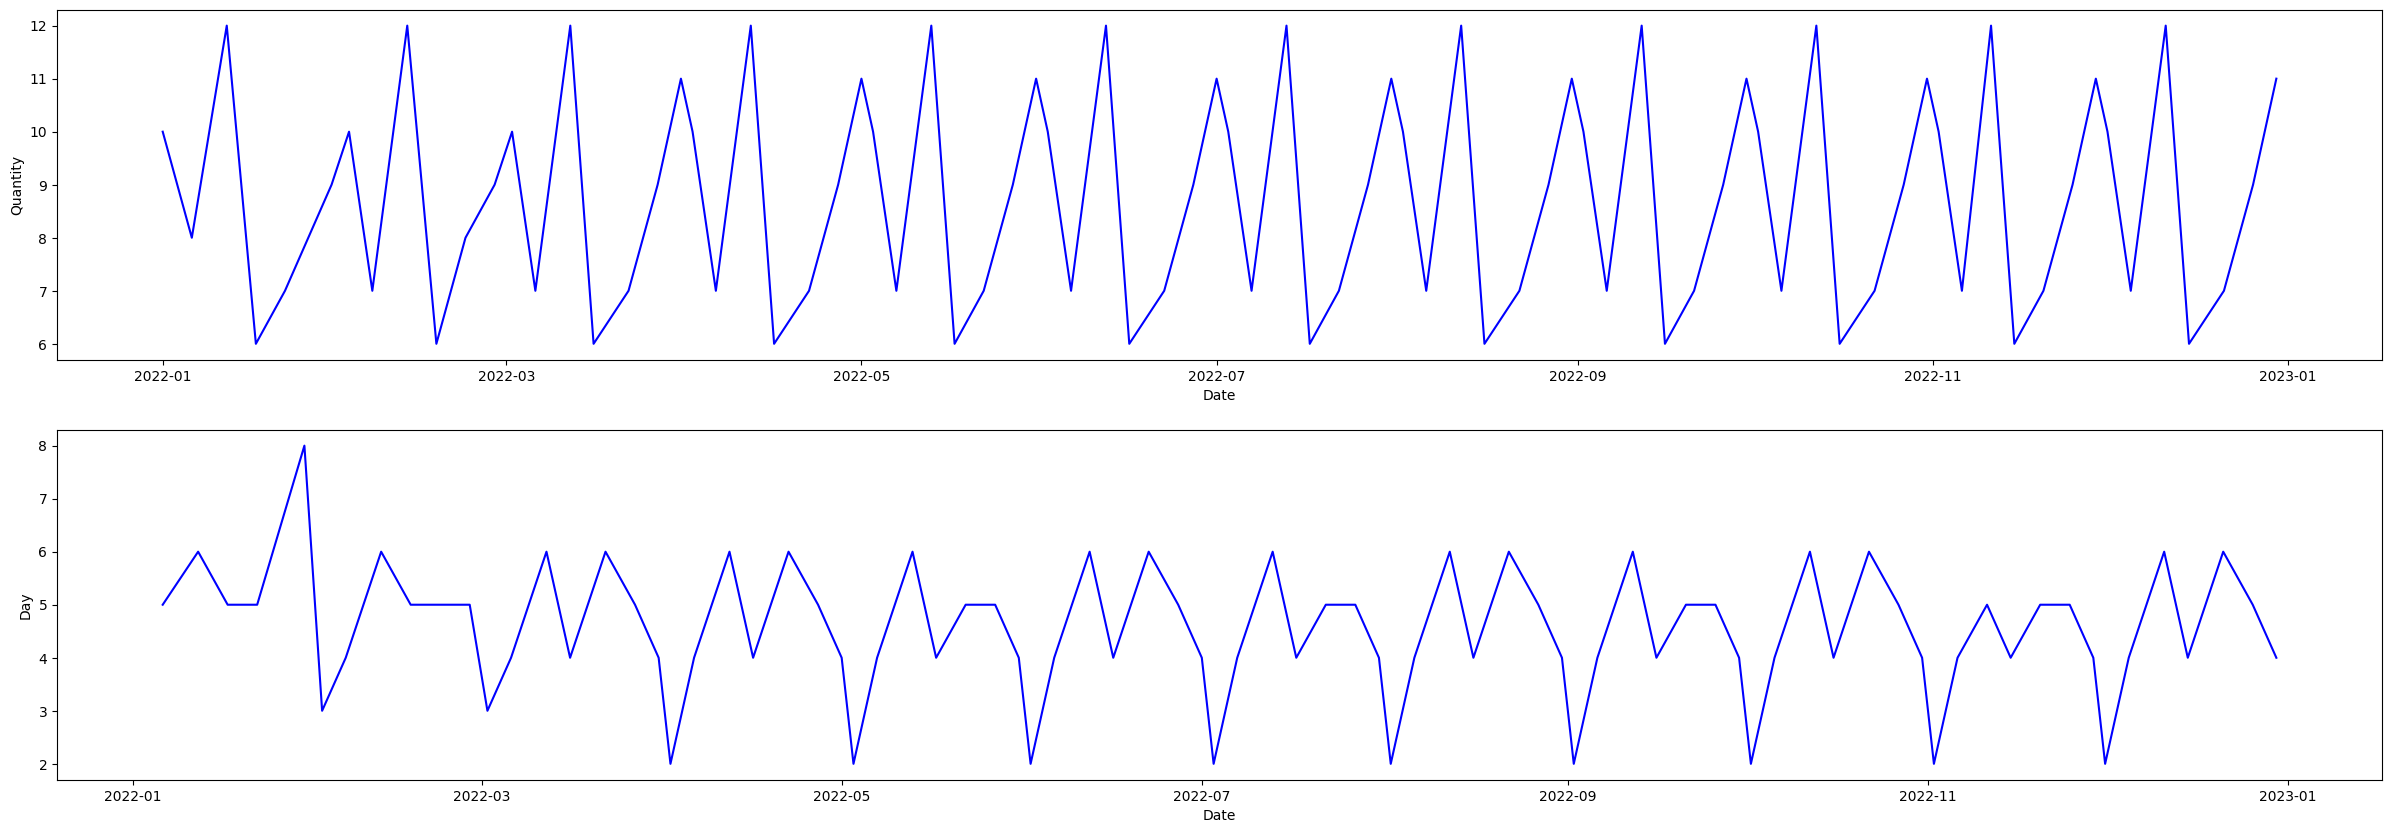

In [80]:
predict_date_and_quantity(df, 'Smartphone')


forecast for product  Smartwatch


<ipython-input-72-7fdeda440477>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-72-7fdeda440477>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = (df['date'] - df['date'].shift(1)).dt.days
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/us

{'quantity_mse': 4.806600220916995,
 'day_mse': 0.5174042662534613,
 'quantity_next': 28    9.0
 dtype: float64,
 'day_next': 27    10.0
 dtype: float64}

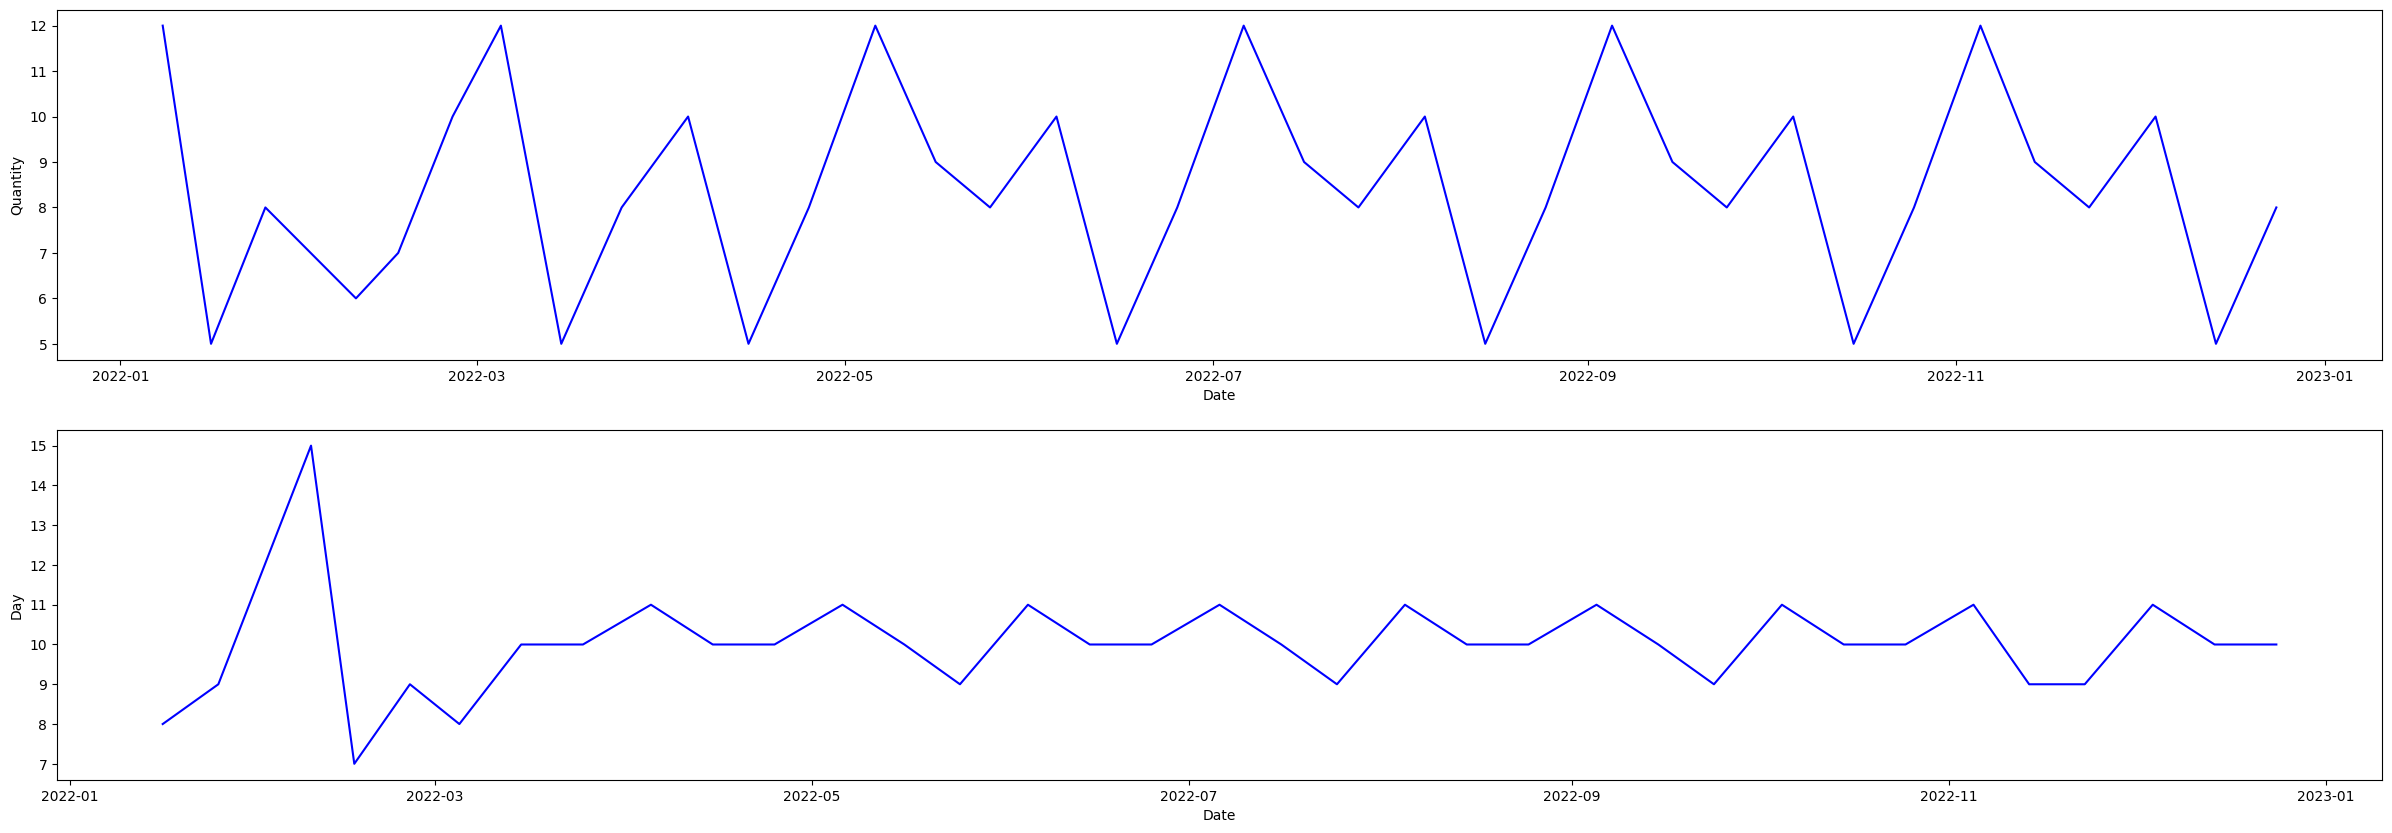

In [74]:
predict_date_and_quantity(df, 'Smartwatch')


Tested with two A-class products. It shows that the behavior of the model is poor in predicting future quantity, but gives good results on the number of days the next product will be ordered is specified.
It is also noted that there is a special pattern in both the quantity and the difference of days between each request, which is known as the cyclical cycle, and the quality may facilitate the prediction process through the use of simpler algorithms such as naive

# **Conclusion**


**Descriptive**
- At this stage we calculate the total revenue and the total quantity, then divide the data using ABC analysis and then focus on category A,
- We compare revenue by months for all A-class products and products, note that we had high profits in May and July, which falls on the summer months
- We also found a difference in revenue in the month of January, which left lower tier products accountable for the difference, so it might be a good idea to split  the products by quarterly breakdown.

**diagnosis**
- There are several answers to the question (why did it happen), I offer recommendations such as obtaining more data or conducting a survey for some customers to see if there is a temporal correlation between purchasing behavior and what is being purchased

**predictive**

- The Arima model was used to forecast demand (when and how much), it shows that the behavior of the model is poor in predicting future quantity, but gives good results on the number of days the next product will be ordered is specified

**Prescriptive**
- Segmentation of products by ABC analysis on a quarterly basis will be more accurate in handling products at all times
-Making offers and discounts in times of lack of demand will be a good thing to increase it, and improving sales deals in times of increased demand will bring more customers, such as adding gifts with some of the products that are purchased

**limitation**

- Small amount of data made the predictive model poorly accurate
